In [1]:
import cv2
import face_recognition as face
import os
import shutil
import random
import dlib
from matplotlib import pyplot as plt

In [2]:
# CUDA test
dlib.DLIB_USE_CUDA

True

In [3]:
def draw_bb(photo:str, top_left:tuple, bottom_right:tuple):
    """Takes a photo, top_left coordinates and bottom_right coordinates
       - returns the copy of the photo with bounding box drawn."""
    photo = cv2.imread(photo)
    photo_copy = photo.copy()
    
    BOUNDING_BOX_COLOR = (0, 0, 255)
    BOUNDING_BOX_THICKNESS = 1
    
    cv2.rectangle(photo_copy, top_left, bottom_right, BOUNDING_BOX_COLOR, BOUNDING_BOX_THICKNESS)
    return photo_copy

In [10]:
# constants
path_photos = "sample_photos\\"
path_processing = "processing\\"
path_results = "results\\"
random.seed(20)

In [11]:
ten_photos = random.sample(os.listdir(path_photos), 10)
ten_photos

['000048.jpg',
 '000045.jpg',
 '000011.jpg',
 '000018.jpg',
 '000049.jpg',
 '000042.jpg',
 '000008.jpg',
 '000022.jpg',
 '000038.jpg',
 '000012.jpg']

In [12]:
for photo in ten_photos:
    shutil.copy(os.path.join(path_photos, photo), path_processing)

In [13]:
# Append photos with BBs to list for plotting
# Get {filename.jpg:[BB coordinates]} dictionary for face extraction
bb_photos_list = []
coordinates = {}
for p in ten_photos:
    try:
        image = face.load_image_file(os.path.join(path_processing, p))
        face_coordinates = face.face_locations(image, model = "cnn")
    
        if face_coordinates:
            left, bottom, right, top = face_coordinates[0]
            bb_photos_list.append(draw_bb(path_processing+p, (top, left), (bottom, right)))
            coordinates[p] = face_coordinates[0]
            print(str(face_coordinates) + " " + p)
        else:
            print("Could not find a face in {p}.")
    except:
        print(f"Error when processing {p} image.\nRetrying using HOG")
        
        image = face.load_image_file(os.path.join(path_processing, p))
        face_coordinates = face.face_locations(image)

        if face_coordinates:
            left, bottom, right, top = face_coordinates[0]
            bb_photos_list.append(draw_bb(path_processing+p, (top, left), (bottom, right)))
            coordinates[p] = face_coordinates[0]
            print(str(face_coordinates) + " " + p)
        else:
            print(f"Could not find a face in {p}.")
        

[(90, 385, 208, 267)] 000048.jpg
[(69, 344, 187, 226)] 000045.jpg
[(103, 274, 201, 176)] 000011.jpg
[(138, 312, 308, 142)] 000018.jpg
[(65, 96, 105, 57)] 000049.jpg
[(119, 250, 289, 80)] 000042.jpg
[(149, 391, 319, 222)] 000008.jpg
[(59, 226, 141, 144)] 000022.jpg
[(164, 351, 367, 148)] 000038.jpg
[(50, 185, 132, 103)] 000012.jpg


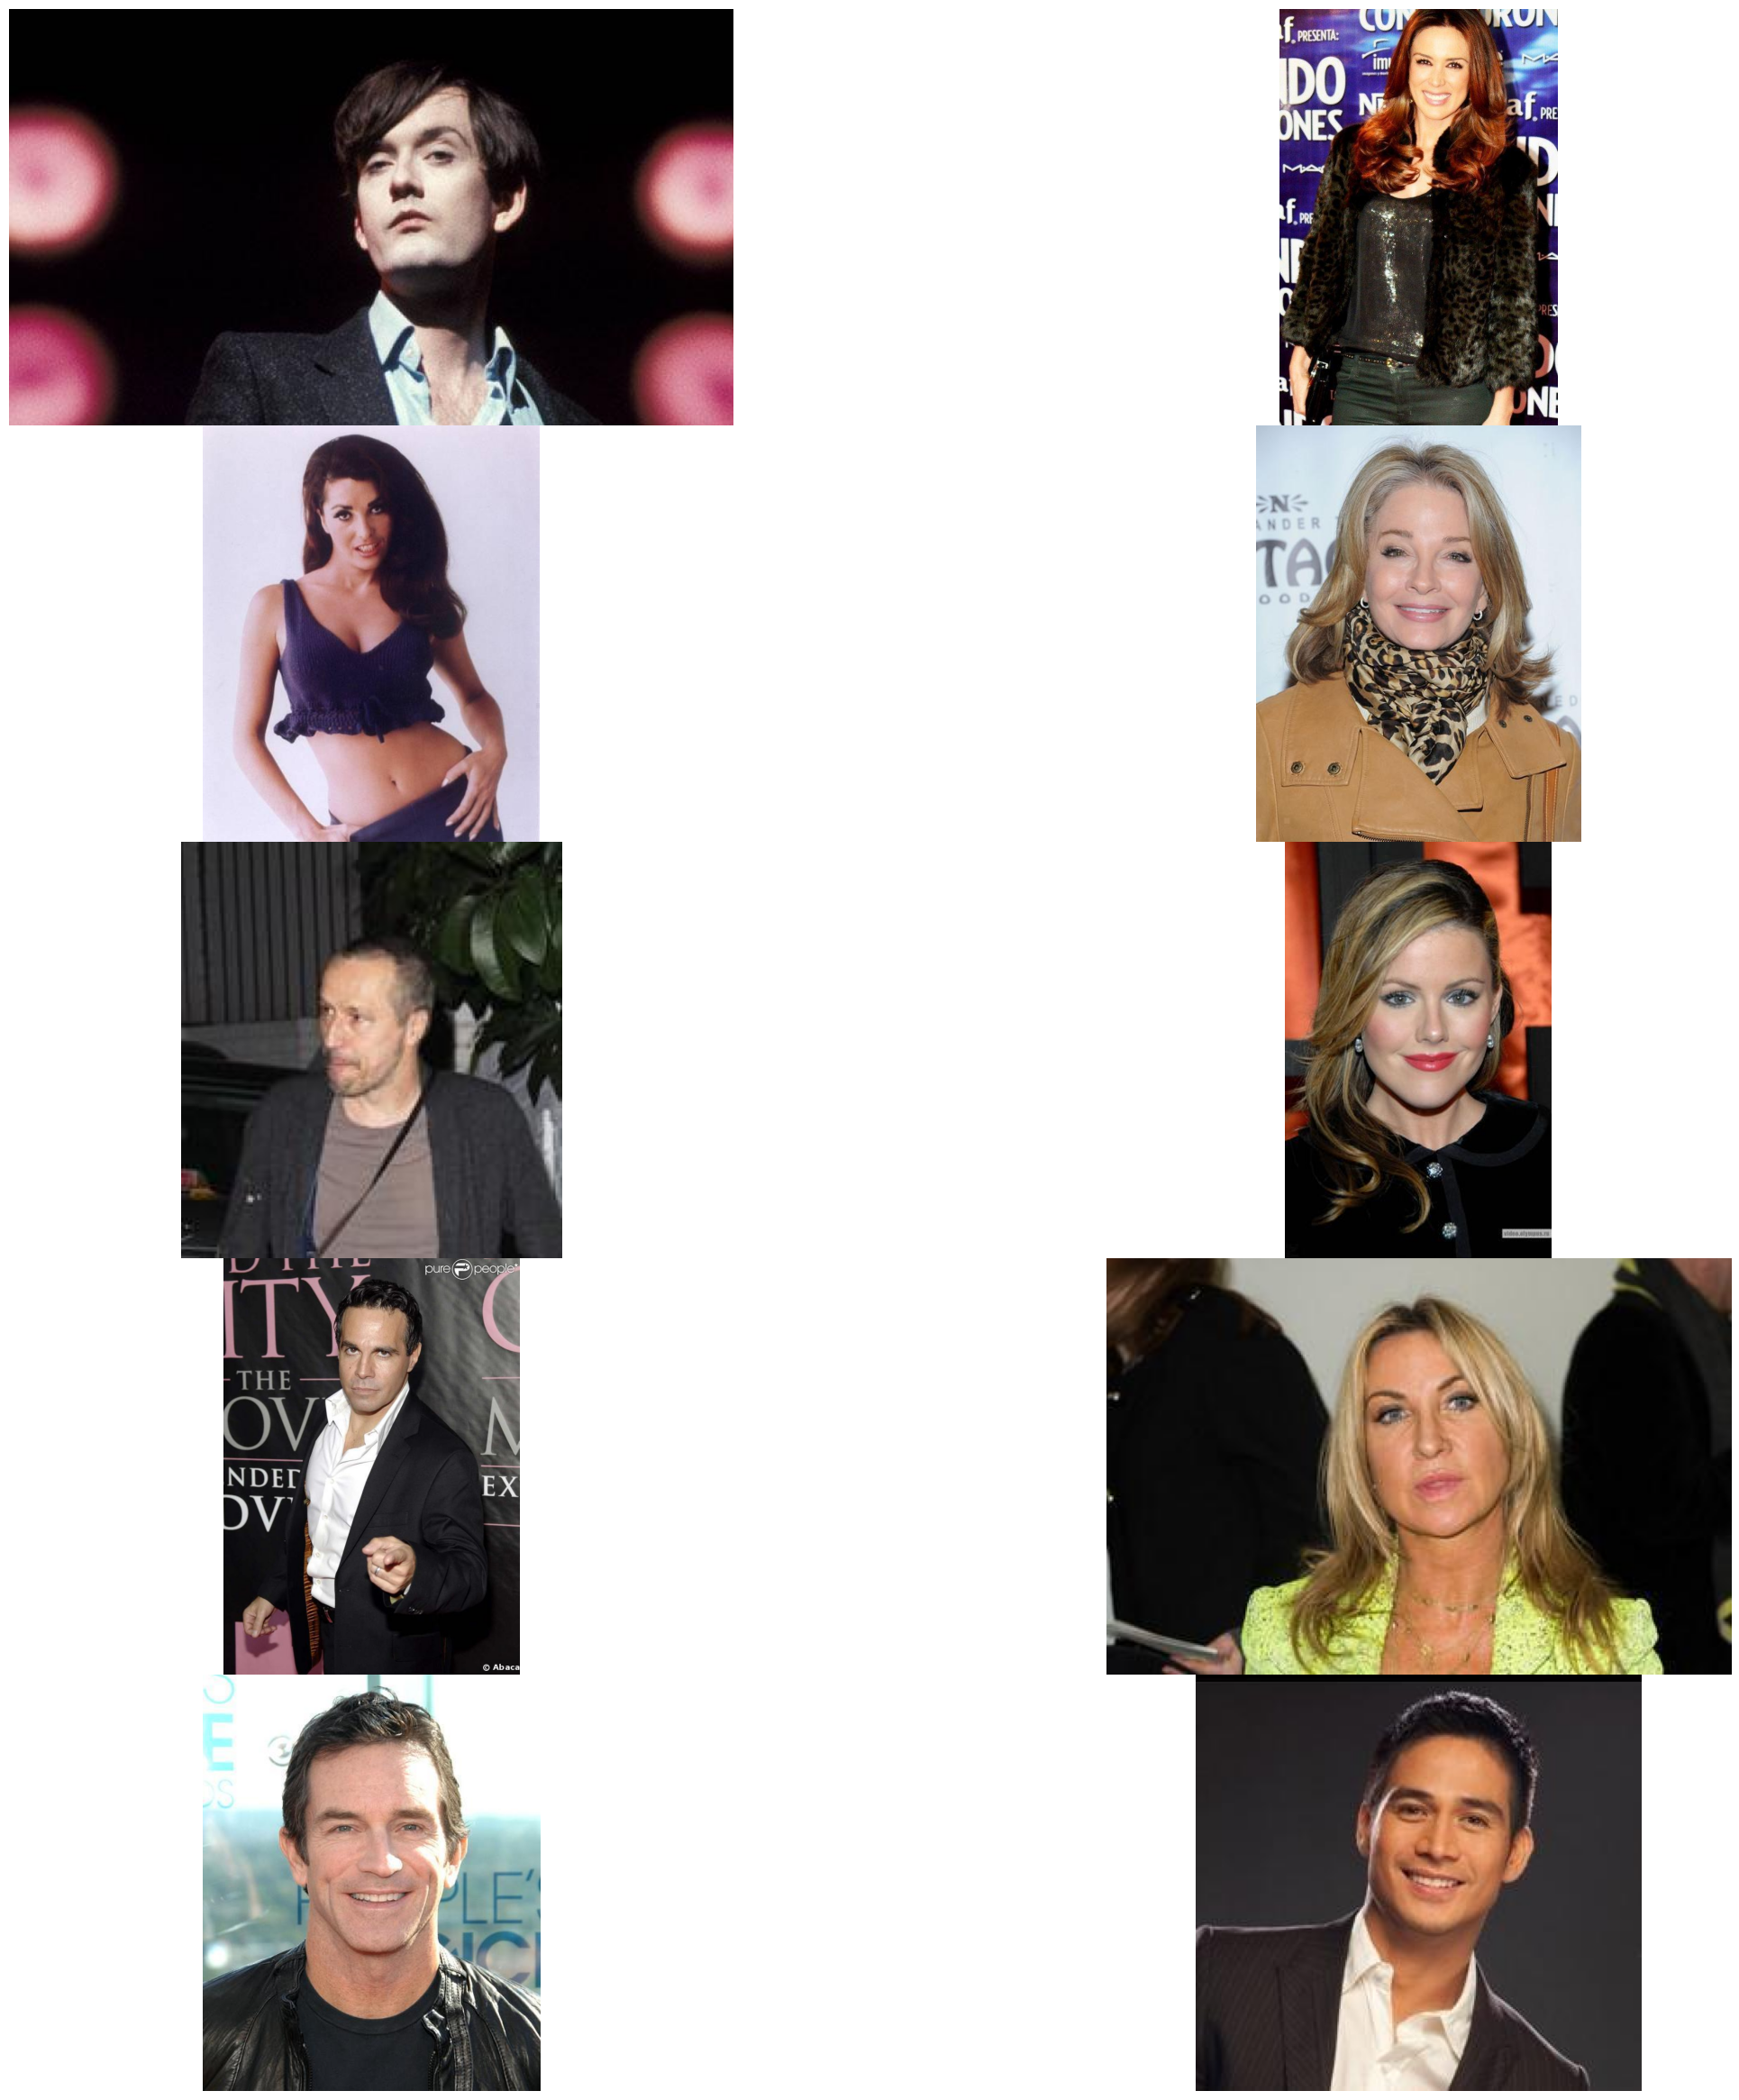

In [14]:
# plot original pictures (without BBs)
i = 1
plt.figure(figsize=(30,30))
for orig_image in ten_photos:
    image = cv2.imread(os.path.join(path_photos,orig_image))
    plt.subplot(5, 2, i)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    i += 1

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

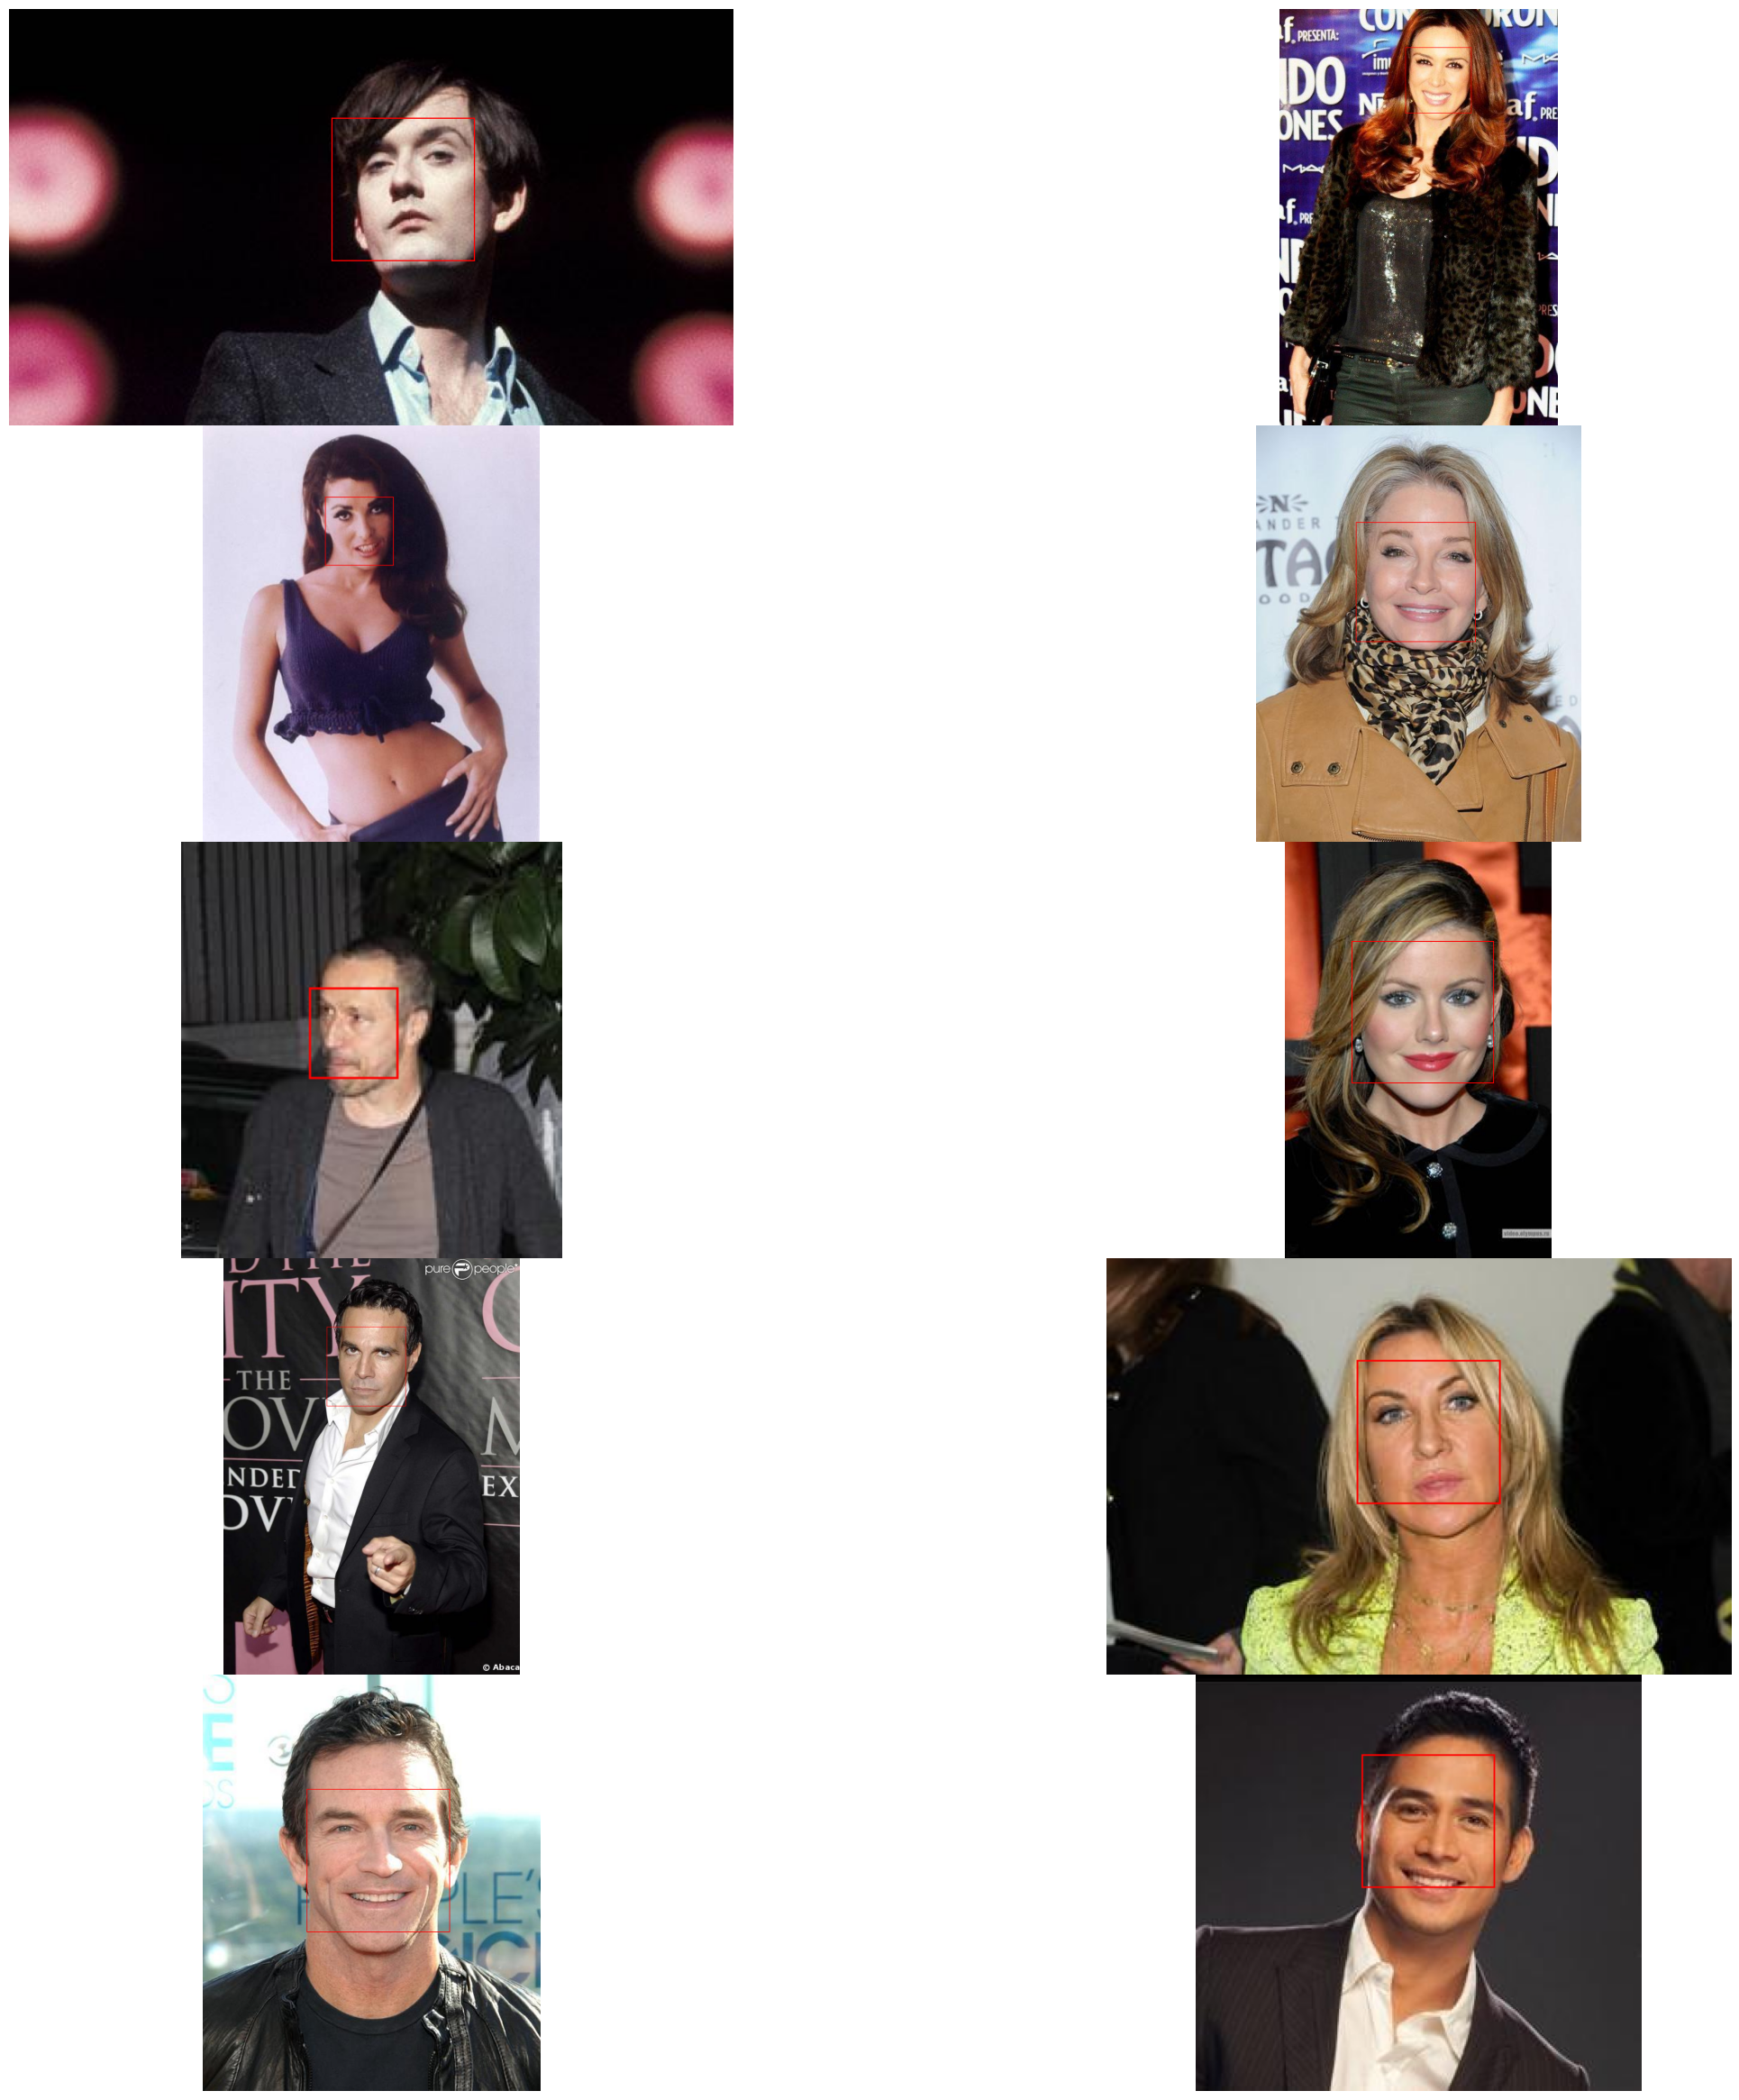

In [15]:
# plot copies of pictures with BBs
i = 1
plt.figure(figsize=(30,30))
for bb_photo in bb_photos_list:
    plt.subplot(5, 2, i)
    plt.imshow(cv2.cvtColor(bb_photo, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    i += 1

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [16]:
# Crop faces from the copies, insert into the results folder
for image, coordinate in coordinates.items():
    try:
        image_old = cv2.imread(path_processing+image)
        image_new = image_old[coordinate[0]:coordinate[2], coordinate[3]:coordinate[1]]
        cv2.imwrite(os.path.join(path_results, image), image_new)
        
        os.remove(os.path.join(path_processing, image))
    except Exception as e:
        print(e)